# Assignment 4
### Robert Kraemer
<b>Due:</b> 11/01/2022

<b>Packages:</b> Students will write Python scripts utilizing the following packages: numpy, pandas, matplotlib, Seaborn, scikit-learn, TensorFlow 2, and others as necessary.

In [123]:
import ssl
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, 
                                   MinMaxScaler)
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor)
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, learning_curve, 
                                     cross_validate, RandomizedSearchCV)
from sklearn.linear_model import (LinearRegression, LogisticRegression, 
                                  SGDClassifier, SGDRegressor, Ridge,
                                  ElasticNet, Lasso)
from sklearn.metrics import (mean_squared_error, classification_report, 
                             confusion_matrix, roc_auc_score, plot_roc_curve, 
                             precision_recall_curve, auc, roc_curve, 
                             r2_score)

### Assignment 4, Part 1: 
Data Exploration. 
- Read in bike_share_hour.csv as a pandas dataframe. The columns are described in the bike_share_readme.txt if you need more information about them.
- Look at the dataset, and convert the columns that are categorical to a pandas “category” type.
- Look for non-null values in the dataset.
- Do a descriptive analysis of the numeric columns.
- Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.
- Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.
- Implement a bar chart for month versus count. Document which months have the most bike rides.
- Implement code to figure out which months belong to which seasons.
- Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.
- Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. Document how season and weathersit are related. 
- Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?
- Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). Does the hourly trend change on weekends?

In [147]:
# Read in bike_share_hour.csv as a pandas dataframe. The columns are
# described in the bike_share_readme.txt if you need more information about them.
bike_share = pd.read_csv("bike_share_hour.csv", skipinitialspace=True)
print(bike_share.shape)
print(bike_share.info())

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [148]:
# Look at the dataset, and convert the columns that are categorical 
# to a pandas “category” type.
bike_share[['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']] = bike_share[['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']].astype('category')
print(bike_share.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB
None


In [149]:
# Look for non-null values in the dataset.
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [150]:
# Do a descriptive analysis of the numeric columns.
bike_share.describe()

,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


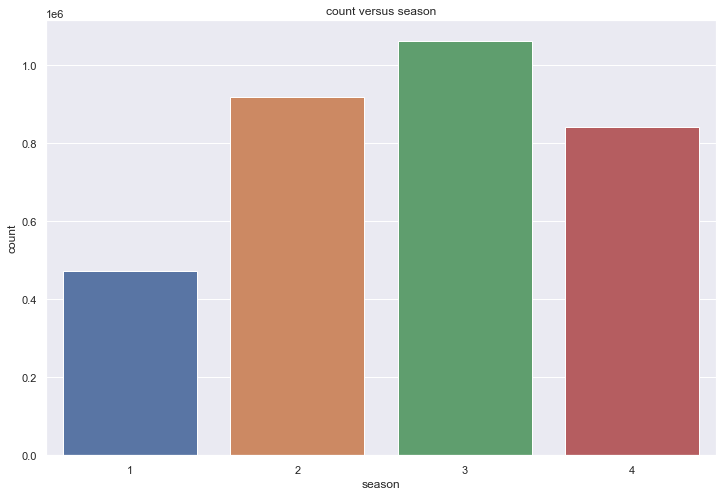

In [151]:
# Implement a bar plot of cnt versus season. Document which season has 
# the most bike rides and which season has the least.
sns.barplot(x=['1', '2', '3', '4'], y=bike_share.groupby(['season']).sum()['cnt'])
plt.title('count versus season')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

Documentation:

Season 1 has the least has the least number of bike rides and season 3 has the most.

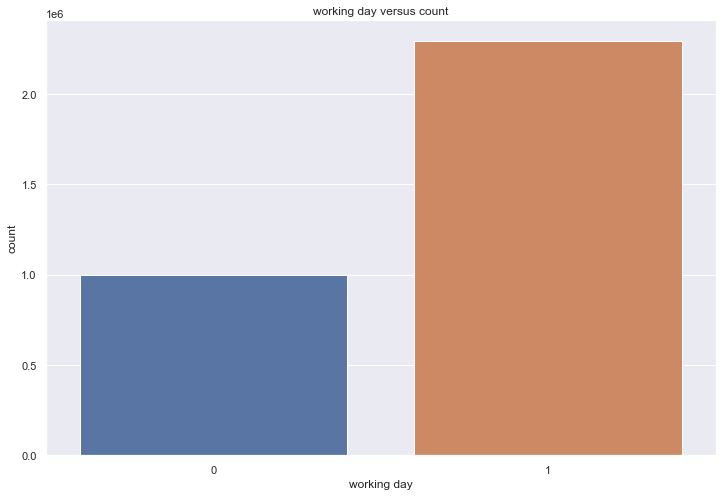

In [152]:
# Implement a bar chart for working day versus count. Document how bike
# rides are distributed across these two classes.
sns.barplot(x=['0', '1'], y=bike_share.groupby(['workingday']).sum()['cnt'])
plt.title('working day versus count')
plt.xlabel('working day')
plt.ylabel('count')
plt.show()

Documentation:

There are almost half the number of bike rentals during the holidays and weekends.

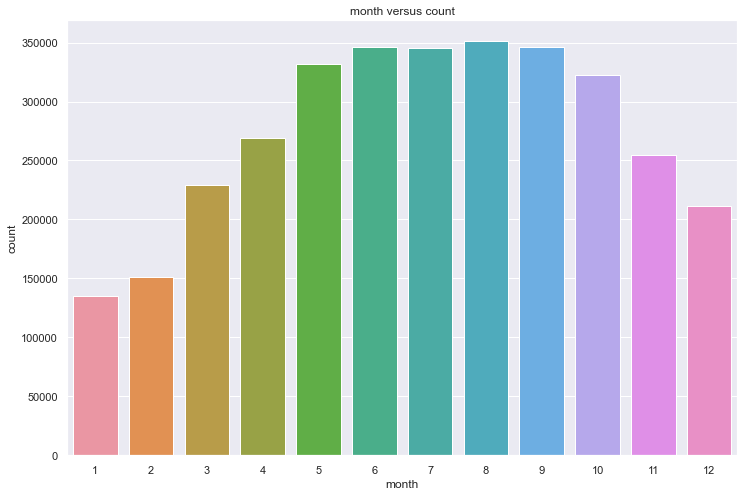

In [153]:
# Implement a bar chart for month versus count. Document which months
# have the most bike rides.
months = list(bike_share['mnth'].unique())
sns.barplot(x=months, y=bike_share.groupby(['mnth']).sum()['cnt'])
plt.title('month versus count')
plt.xlabel('month')
plt.ylabel('count')
plt.show()

Documentation: 

Month 8 has the highest number of bike rentals, followed by months 6, 7, and 9. 

In [154]:
# Implement code to figure out which months belong to which seasons.
seasons = [1, 2, 3, 4]
months_seasons = bike_share[['season','mnth']].drop_duplicates()
for s in seasons:
    print("Season", s,":", list(months_seasons[months_seasons['season']==s]['mnth']))

Season 1 : [1, 2, 3, 12]
Season 2 : [3, 4, 5, 6]
Season 3 : [6, 7, 8, 9]
Season 4 : [9, 10, 11, 12]


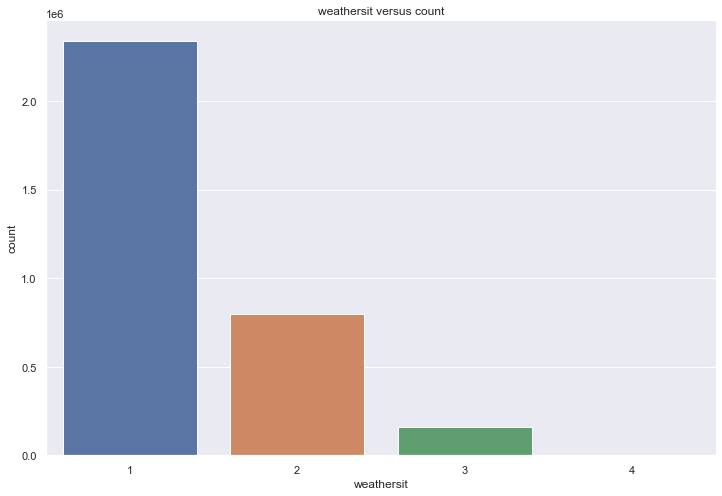

In [155]:
# Implement a bar plot of weathersit versus cnt. Document which weather
# situation has less bike rentals.
weather = list(bike_share['weathersit'].unique())
sns.barplot(x=weather, y=bike_share.groupby(['weathersit']).sum()['cnt'])
plt.title('weathersit versus count')
plt.xlabel('weathersit')
plt.ylabel('count')
plt.show()

Documentation: 

Weathersit 4 has the least number of bike rentals.

Text(0, 0.5, 'count')

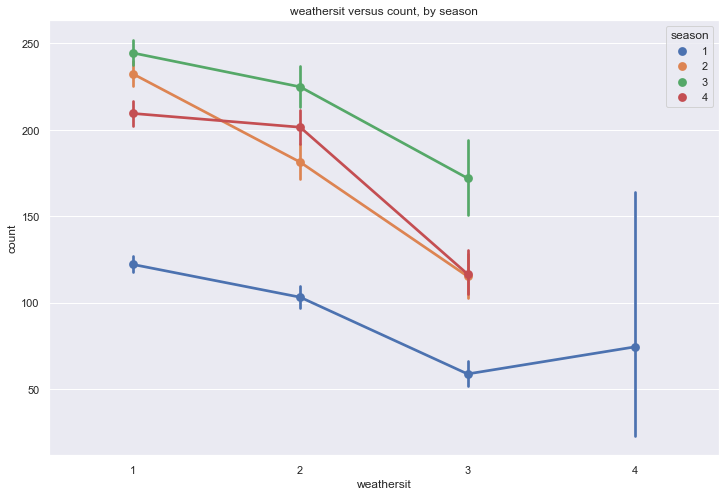

In [156]:
# Implement a point plot of weathersit on the x-axis, count on the y-axis, and
# the season as the hue. Document how season and weathersit are related.
sns.pointplot(data=bike_share, x='weathersit', y='cnt', hue='season')
plt.title('weathersit versus count, by season')
plt.xlabel('weathersit')
plt.ylabel('count')

Documentation: 

The pointplot shows that as weather gets worse, the number of bike rentals decreases.

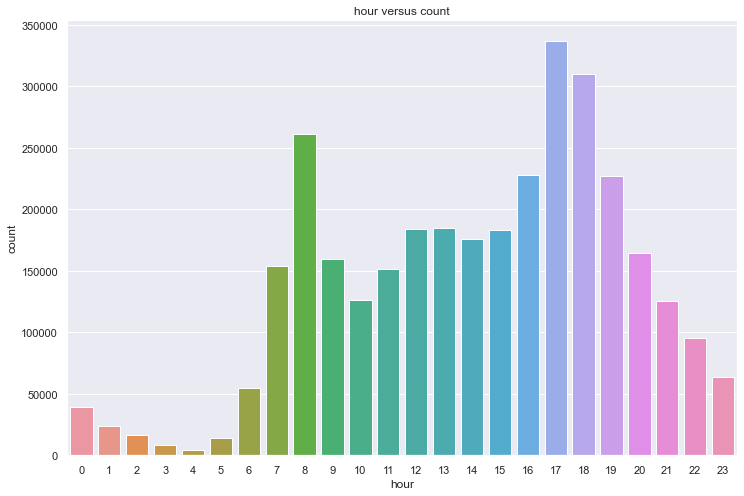

In [157]:
# Implement a bar plot of hour versus count. Are there any specific hours
# that are busier than others?
hour = list(bike_share['hr'].unique())
sns.barplot(x=hour, y=bike_share.groupby(['hr']).sum()['cnt'])
plt.title('hour versus count')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

Documentation: 

Hour 8, 17, and 18 are the busiest for bike rentals.

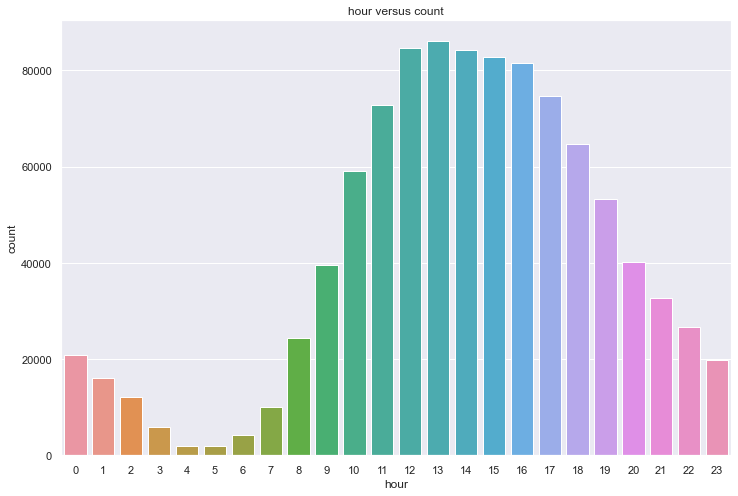

In [158]:
# Implement a bar plot of hour versus count on weekends and holidays
# (when workingday = 0). Does the hourly trend change on weekends?
temp = bike_share[bike_share['workingday'] == 0]
hour = list(temp['hr'].unique())
sns.barplot(x=hour, y=temp.groupby(['hr']).sum()['cnt'])
plt.title('hour versus count')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

Documentation:

The trend changes on weekends, with bike rentals are more consistent and normally distributed throughout the day. 

### Assignment 4, Part 2: 
Data Preparation. 
- Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
- Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
- Drop the following columns from your dataset: casual, registered, dteday, instant.
- Implement a histogram of the count column. What can be said based on the resulting distribution?
- Implement a train/test split with a test size of 33%.
- Implement a baseline linear regression algorithm. Use cross-validation to 
output r2 and mse. Calculate RMSE base on mse. Document your scores.

             instant        hr      temp     atemp       hum  windspeed  \
instant     1.000000 -0.004775  0.136178  0.137615  0.009577  -0.074505   
hr         -0.004775  1.000000  0.137603  0.133750 -0.276498   0.137252   
temp        0.136178  0.137603  1.000000  0.987672 -0.069881  -0.023125   
atemp       0.137615  0.133750  0.987672  1.000000 -0.051918  -0.062336   
hum         0.009577 -0.276498 -0.069881 -0.051918  1.000000  -0.290105   
windspeed  -0.074505  0.137252 -0.023125 -0.062336 -0.290105   1.000000   
casual      0.158295  0.301202  0.459616  0.454080 -0.347028   0.090287   
registered  0.282046  0.374141  0.335361  0.332559 -0.273933   0.082321   
cnt         0.278379  0.394071  0.404772  0.400929 -0.322911   0.093234   

              casual  registered       cnt  
instant     0.158295    0.282046  0.278379  
hr          0.301202    0.374141  0.394071  
temp        0.459616    0.335361  0.404772  
atemp       0.454080    0.332559  0.400929  
hum        -0.347028   -

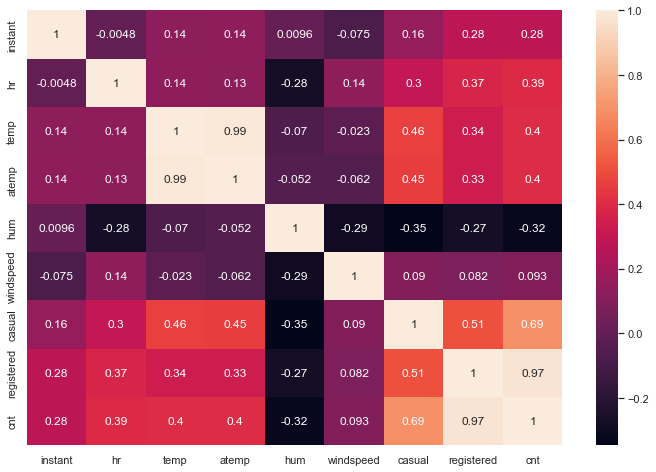

In [159]:
# Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
corrMatrix = bike_share.corr()
print (corrMatrix)
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

Documentation: 

The relationship between 'temp' and 'atemp' and the relationship between 'registered' and 'cnt' appear to be highly correlated.

In [160]:
# Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
for col in ['instant', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
    arr = np.array(bike_share[col])
    scaler = StandardScaler()
    scaler.fit(arr.reshape(-1,1))
    bike_share[col]=scaler.transform(arr.reshape(-1,1))

In [161]:
# Drop the following columns from your dataset: casual, registered, dteday, instant.
bike_share.drop(columns = ['casual', 'registered', 'dteday', 'instant'], inplace = True)

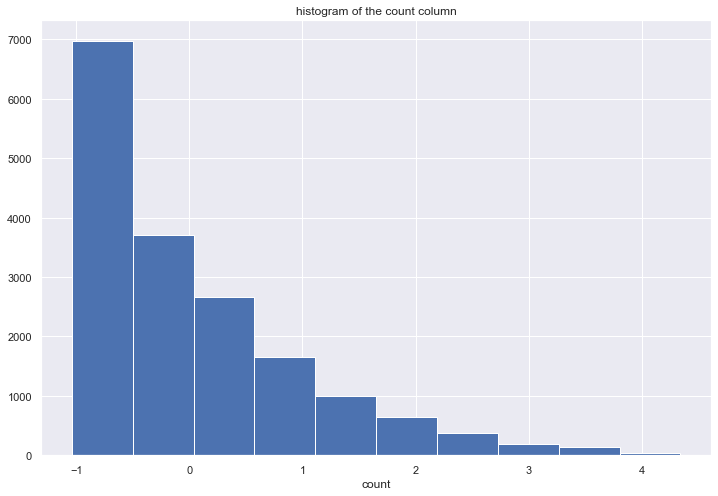

In [162]:
# Implement a histogram of the count column. What can be said based on the resulting distribution?
plt.hist(x = bike_share['cnt'])
plt.title('histogram of the count column')
plt.xlabel('count')
plt.show()

Documentation: 

Lower counts of bike rentals are more common. 

In [163]:
# Implement a train/test split with a test size of 33%.
X = bike_share.drop('cnt', axis=1)
y = bike_share['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
# Implement a baseline linear regression algorithm. Use cross-validation to
# output r2 and mse. Calculate RMSE base on mse. Document your scores.
lm = LinearRegression()
lm.fit(X_train, y_train)
r2 = cross_val_score(lm, X_train, y_train, scoring='r2')
mse = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error')
mse = -mse
rmse = np.sqrt(mse)
print("\nR2:", r2.mean())
print("\nMSE mean:", mse.mean())
print("\nRMSE mean:", rmse.mean())


R2: 0.38506139505029086

MSE mean: 0.6234480824773813

RMSE mean: 0.7894616753334466


###  Assignment 4, Part 3:
Model Training (Hint: trained all of these with a for loop and added my results to a PrettyTable.)

- Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset.
- Drop the original categorical columns from your source dataset.
- Do a test/train split based on your new source dataset. Implement and fit a new linear model on your new training set.
- What are the new values for r2, mse, and rmse?
- Implement and score a decision tree regressor with random_state=0. 
- Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.
- Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).
- Implement and score a Lasso Regressor with alpha=0.1.
- Implement and score an ElasticNet Regressor with random_state=0. 
- Implement and score a Ridge Regressor with alpha=0.5.
- Implement and score a BaggingRegressor.

In [165]:
# Create one-hot-encoded values for your categorical columns using
# get_dummies and add them to your source dataset.
for col in ['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']:
    temp = pd.get_dummies(bike_share[col], prefix=col)
    bike_share = bike_share.join(temp)

In [166]:
# Drop the original categorical columns from your source dataset. 
bike_share = bike_share.drop(['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit'], axis=1)

In [167]:
# Do a test/train split based on your new source dataset. Implement and fit a
# new linear model on your new training set.
X = bike_share.drop('cnt', axis=1)
y = bike_share['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [168]:
# What are the new values for r2, mse, and rmse?
r2 = cross_val_score(lm, X_train, y_train, scoring='r2')
mse = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error")
mse = -mse
rmse = np.sqrt(mse)
print("\nR2:", r2.mean())
print("\nMSE mean:", mse.mean())
print("\nRMSE mean:", rmse.mean())


R2: 0.40092028643188726

MSE mean: 0.6073529114337564

RMSE mean: 0.7792149725660076


In [169]:
# Implement and score: 
#  Decision tree regressor with random_state=0
#  RandomForestRegressor with random_state=0 and n_esitmators=30
#  SGDRegressor with max_iter=1000 and tol=1e-3)
#  Lasso Regressor with alpha=0.1
#  ElasticNet Regressor with random_state=0
#  Ridge Regressor with alpha=0.5
#  BaggingRegressor
models = [DecisionTreeRegressor(random_state=0), 
          RandomForestRegressor(random_state=0, n_estimators=30), 
          SGDRegressor(max_iter=1000, tol=0.001),
          Lasso(alpha=0.1),
          ElasticNet(random_state=0),
          Ridge(alpha=0.5), 
          BaggingRegressor()
         ]
tbl = PrettyTable()
tbl.field_names = ["model", "cross_val_score"]
random.seed(123)
for m in models:
    m.fit(X_train, y_train)
    scores = cross_val_score(m, X_train, y_train)
    tbl.add_row([m, scores.mean()])
print(tbl)

+--------------------------------------------------------+------------------------+
|                         model                          |    cross_val_score     |
+--------------------------------------------------------+------------------------+
|         DecisionTreeRegressor(random_state=0)          |   0.8758406045773102   |
| RandomForestRegressor(n_estimators=30, random_state=0) |   0.9341320495637355   |
|                     SGDRegressor()                     |   0.399248445006043    |
|                    Lasso(alpha=0.1)                    |   0.3111689187305373   |
|               ElasticNet(random_state=0)               | -0.0006898547576850156 |
|                    Ridge(alpha=0.5)                    |   0.4009214673806496   |
|                   BaggingRegressor()                   |   0.9284090952196895   |
+--------------------------------------------------------+------------------------+


Top three performing models: RandomForestRegressor, BaggingRegressor, and DecisionTreeRegressor.

### Assignment 4, Part 4:
Model Tuning. 

- Take the top three performing models and implement cross-validation on them.
    - Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor.
- Take your top performing model (mine was the RandomForestRegressor) and do a randomize search cv with 20 iterations and three folds.
    - I found it is best to set your n_jobs = (# of cpu’s you have – 1). This took about 10 minutes on my MacBook with 4 CPUs and 8 GB of memory.
    - Your param distributions should include the following:
        - Bootstrap: true, false
        - Max_depth: 10-110, number of bins 11
        - Max_features: auto, sqrt
        - Min_samples_split: 2,5,10
        - Min_samples_leaf: 1,2,4
        - N_estimators: 200 – 2000, number of bins 10
- Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.

Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.

In [175]:
# Take the top three performing models and implement cross-validation on them.
for model in [DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0, n_estimators=30), BaggingRegressor()]:
    model.fit(X_train, y_train)
    scores = cross_validate(model, X_train, y_train, scoring=('r2', 'neg_mean_squared_error'))
    rmse = np.sqrt(-scores['test_neg_mean_squared_error'])
    print()
    print(model)
    print("R2:", scores['test_r2'].mean())
    print("MSE mean:", (-scores['test_neg_mean_squared_error'].mean()))
    print("RMSE mean:", rmse.mean())


DecisionTreeRegressor(random_state=0)
R2: 0.8758406045773102
MSE mean: 0.12593789889166035
RMSE mean: 0.35448769037904604

RandomForestRegressor(n_estimators=30, random_state=0)
R2: 0.9341320495637355
MSE mean: 0.06671302784801217
RMSE mean: 0.25802313386038944

BaggingRegressor()
R2: 0.9273541161004261
MSE mean: 0.07356661313876812
RMSE mean: 0.2709500532670995


In [171]:
# Take your top performing model (mine was the RandomForestRegressor)
# and do a randomize search cv with 20 iterations and three folds.
new_params = {'bootstrap': (True,False), 
              'max_depth': np.arange(10,110,11), 
              'max_features': ['auto','sqrt'], 
              'min_samples_split': [2,5,10], 
              'min_samples_leaf': [1,2,4], 
              'n_estimators': np.arange(200,2000,10)
             }
rfr_grid = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=new_params, cv=3, n_jobs=3, n_iter=20)
rfr_grid.fit(X_train, y_train)
print(rfr_grid.best_estimator_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=87, max_features='auto', n_estimators=1450)


In [172]:
# Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
rfr = rfr_grid.best_estimator_
rfr.fit(X_train, y_train)
r2 = cross_val_score(rfr, X_train, y_train, scoring='r2')
mse = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error")
mse = -mse
rmse = np.sqrt(mse)
print("\nR2:", r2.mean())
print("\nMSE mean:", mse.mean())
print("\nRMSE mean:", rmse.mean())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou


R2: 0.9370901579308143

MSE mean: 0.06370701632882521

RMSE mean: 0.2521278458338513


In [174]:
# Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.
prediction = rfr.predict(X_test)
print("\nR2 score:", r2_score(y_test, prediction))
print("\nRSME score:", mean_squared_error(y_test, prediction, squared=False))


R2 score: 0.9440260517824001

RSME score: 0.23297165633829042
